In [2]:
# Importing Library
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
df.pivot_table(index='job_title_short', aggfunc='size')

# Size -> counts all rows in a group (Value/Column not required)
# COUNT -> Counts non-NA values in each group (Value/Count required)

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [5]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [6]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [7]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [8]:
top_countries = df.job_country.value_counts().head(6).index

top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [9]:
df_job_country_salary = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


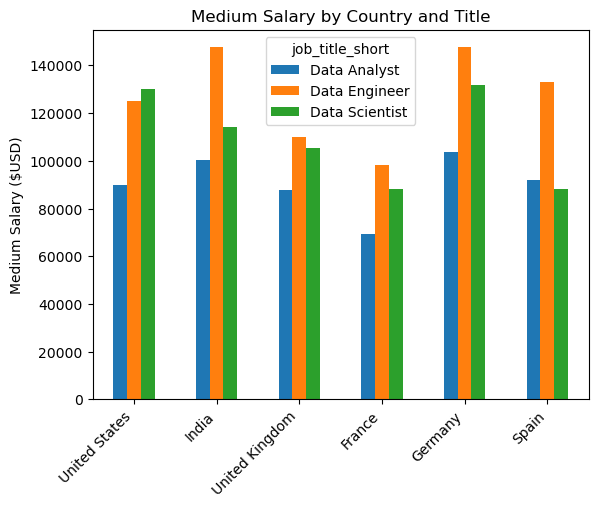

In [11]:
df_job_country_salary.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Medium Salary ($USD)')
plt.title('Medium Salary by Country and Title')
plt.xticks(rotation=45, ha='right')
plt.show()

# Practise Exercise

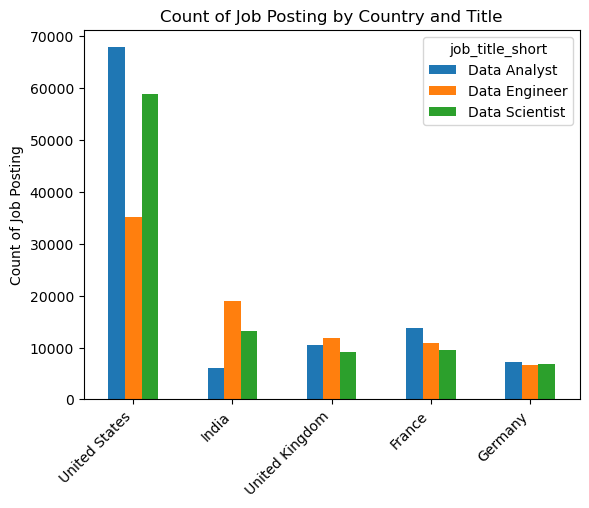

In [12]:
# Count Job Postings by Title and Country using the pandas pivot.
df_job_title_count = df.pivot_table(
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'size'
)

# Finding the countries with top 5 job posting.
top_countries = df.job_country.value_counts().head(5).index

# Filter the dataframe with the top 5 countries.
df_job_title_count = df_job_title_count.loc[top_countries]

# Filter out this with specific job titles.
df_job_title_count =df_job_title_count[job_titles]

# Plot the graph.
df_job_title_count.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count of Job Posting')
plt.title('Count of Job Posting by Country and Title')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='job_title_short'>

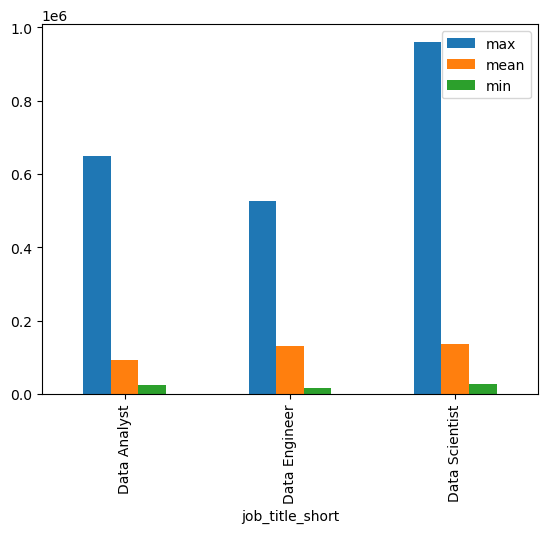

In [13]:
df_salary_stats = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_title_short',
    aggfunc = 'describe'
)

df_salary_stats = df_salary_stats.loc[job_titles]

df_salary_stats = df_salary_stats[['max', 'mean', 'min']]

df_salary_stats.plot(kind='bar')

# AI Generated Question

In [16]:
# Create a Pivot Table for Average Salary.

average_salary_pivot = df.pivot_table(
    values = 'salary_year_avg',
    index ='job_title_short',
    aggfunc = 'median'
    )

average_salary_pivot

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [18]:
# Count the number of job Titles

job_title_count_pivot = df.pivot_table(
    index = 'job_title_short',
    aggfunc = 'size'
)

job_title_count_pivot

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [22]:
# Analyze Data by Country and Job Title

country_job_title_analysis = df.groupby(['job_title_short', 'job_country'])['salary_year_avg'].agg(['max', 'median', 'min'])

print(country_job_title_analysis)

                                   max   median      min
job_title_short   job_country                           
Business Analyst  Afghanistan      NaN      NaN      NaN
                  Albania          NaN      NaN      NaN
                  Algeria          NaN      NaN      NaN
                  Angola           NaN      NaN      NaN
                  Argentina    79200.0  71100.0  63000.0
...                                ...      ...      ...
Software Engineer Venezuela        NaN      NaN      NaN
                  Vietnam      79200.0  53600.0  28000.0
                  Yemen            NaN      NaN      NaN
                  Zambia           NaN      NaN      NaN
                  Zimbabwe         NaN      NaN      NaN

[1387 rows x 3 columns]


In [24]:
# Pivot Countries and Job Titles Median Salary.

df_job_country_salary = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


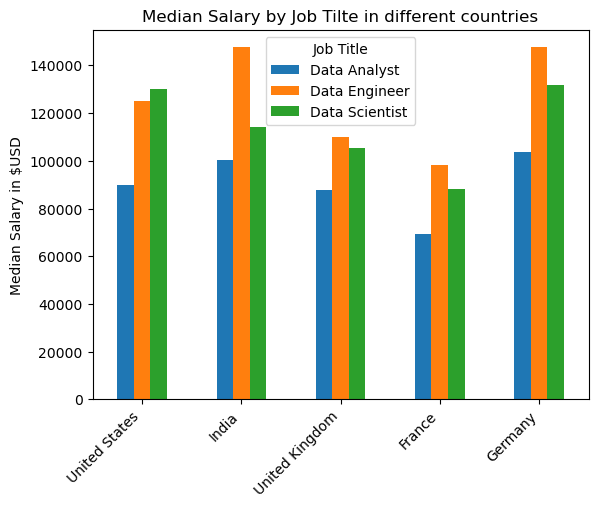

In [38]:
# Plot Median Salary by Country and Job Title

top_countries = df.job_country.value_counts().head(5).index

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_title = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_country_salary = df_job_country_salary[job_title]

df_job_country_salary.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median Salary in $USD')
plt.title('Median Salary by Job Tilte in different countries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Title')
plt.show()